# Plotting Total Reach and Sponsored Reach Over Time

In [1]:
import pandas as pd


reach_data = pd.read_excel("Reach.xlsx")
ads_daily_data = pd.read_excel("ads_daily_Jul-8-2023-to-Apr-6-2024.xlsx")

reach_data['Date'] = pd.to_datetime(reach_data['Date'])
ads_daily_data['Day'] = pd.to_datetime(ads_daily_data['Day'], format='%d.%m.%Y')

merged_data = pd.merge(ads_daily_data, reach_data, left_on='Day', right_on='Date', how='outer')

merged_data.rename(columns={'Reach': 'Sponsored_Reach', 'Primary': 'Total_Reach'}, inplace=True)

merged_data['Sponsored_Reach'].fillna(0, inplace=True)

merged_data['Ads_Run'] = merged_data['Amount spent (UAH)'].apply(lambda x: 1 if pd.notnull(x) else 0)

merged_data = merged_data[['Date', 'Total_Reach', 'Sponsored_Reach', 'Currency', 'Amount spent (UAH)', 'Ads_Run']]

merged_data['Amount spent (UAH)'].fillna(0, inplace=True)
merged_data['Currency'].fillna('UAH', inplace=True)


sorted_merged_data = merged_data.sort_values(by='Date')

sorted_merged_data = sorted_merged_data.reset_index(drop=True)
sorted_merged_data['Date'] = pd.to_datetime(sorted_merged_data['Date'])

sorted_merged_data.set_index('Date', inplace=True)



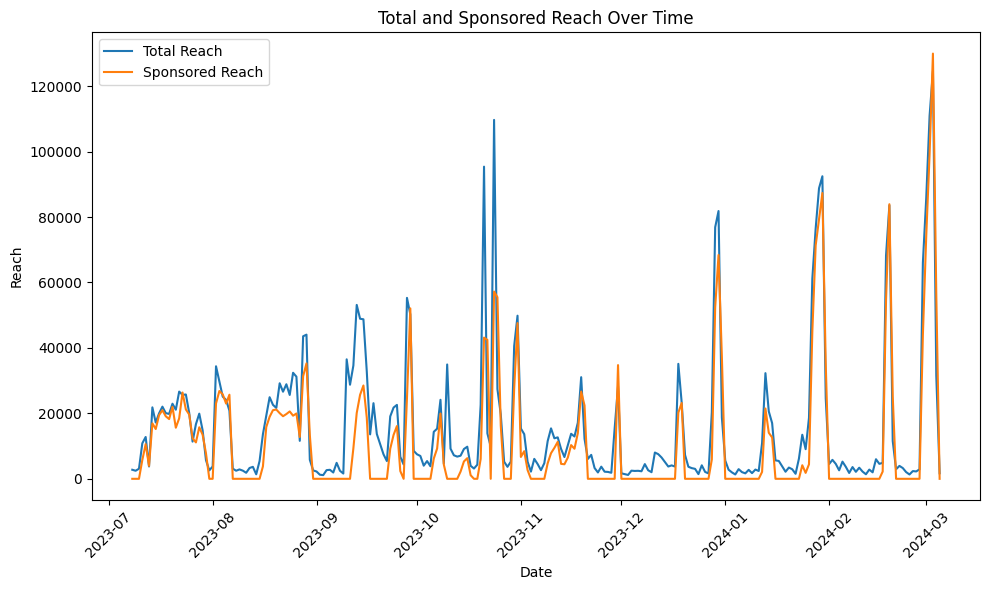

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))


plt.plot(sorted_merged_data['Total_Reach'], label='Total Reach')


plt.plot(sorted_merged_data['Sponsored_Reach'], label='Sponsored Reach')


plt.xlabel('Date')
plt.ylabel('Reach')
plt.title('Total and Sponsored Reach Over Time')
plt.legend()


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
import statsmodels.api as sm


X = sorted_merged_data[['Sponsored_Reach', 'Amount spent (UAH)']]
y = sorted_merged_data['Total_Reach']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Reach   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     643.3
Date:                Sun, 28 Apr 2024   Prob (F-statistic):           6.25e-97
Time:                        13:14:25   Log-Likelihood:                -2533.2
No. Observations:                 242   AIC:                             5072.
Df Residuals:                     239   BIC:                             5083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4465.5143    655

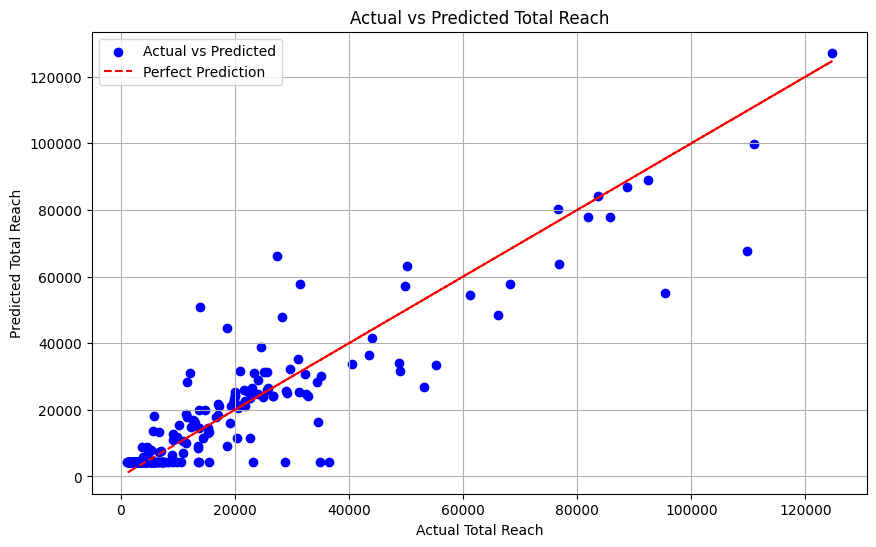

In [10]:
predicted_values = 4465.5143 + merged_data['Sponsored_Reach'] * 0.8751 + merged_data['Amount spent (UAH)'] * 7.1091

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total_Reach'], predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(merged_data['Total_Reach'], merged_data['Total_Reach'], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Total Reach')
plt.xlabel('Actual Total Reach')
plt.ylabel('Predicted Total Reach')
plt.legend()
plt.grid(True)
plt.show()

This code cell installs the pmdarima package using pip. This package is used for fitting and forecasting ARIMA models, among other time series analysis tasks.

In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.2 MB/s eta 0:00:00


# Performing Ordinary Least Squares (OLS) Regression

This code snippet reads data from an Excel file named "combined.xlsx" into a pandas DataFrame. It then selects the independent variable 'Amount spent (UAH)' and the dependent variable 'Sessions from Facebook'. The statsmodels library is used to fit an OLS regression model.



In [11]:
df = pd.read_excel("combined.xlsx")

X = df[['Amount spent (UAH)']]

X = sm.add_constant(X)

y = df['Sessions from Facebook']

model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Sessions from Facebook   R-squared:                       0.039
Model:                                OLS   Adj. R-squared:                  0.035
Method:                     Least Squares   F-statistic:                     9.756
Date:                    Sun, 28 Apr 2024   Prob (F-statistic):            0.00201
Time:                            13:16:05   Log-Likelihood:                -1166.5
No. Observations:                     241   AIC:                             2337.
Df Residuals:                         239   BIC:                             2344.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Calculating Pearson's Correlation Coefficient

This code snippet calculates Pearson's correlation coefficient between two variables: 'Impressions' and 'Sessions from Facebook' from a pandas DataFrame named df.

In [12]:
from scipy.stats import pearsonr

impressions = df['Impressions']
sessions_from_facebook = df['Sessions from Facebook']

correlation_coefficient, p_value = pearsonr(impressions, sessions_from_facebook)

print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson correlation coefficient: 0.15697233404863561
p-value: 0.014714217191550142


# Fitting an ARIMA model to website traffic

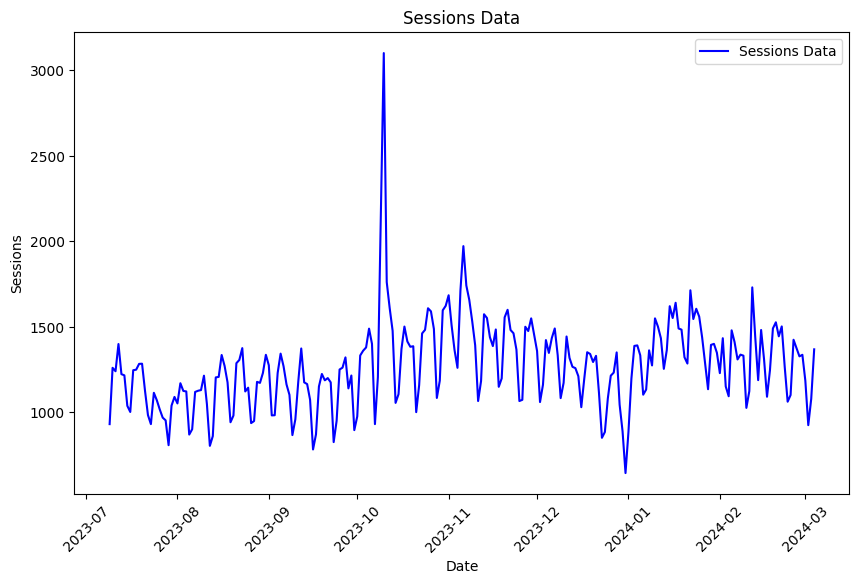

In [15]:
df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Sessions'], color='blue', label='Sessions Data')

plt.title('Sessions Data')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

This code snippet searches for outliers in the data by calculating z-scores for each data point and checking if it is whithin the threshold

In [16]:
import numpy as np

z_scores = (df['Sessions'] - df['Sessions'].mean()) / df['Sessions'].std()

threshold = 3

outliers = df[np.abs(z_scores) > threshold]

print(outliers)

            Total_Reach  Impressions  Frequency  Page engagement  \
Date                                                               
2023-10-09         4626         4425   1.021232              166   
2023-10-10        34939            0   0.000000                0   

            Sponsored_Reach Currency  Amount spent (UAH)  Ads_Run  \
Date                                                                
2023-10-09             4333      UAH               88.14        1   
2023-10-10                0      UAH                0.00        0   

            Total events  Total users Event count per user  \
Date                                                         
2023-10-09          7555         1964    4.204229271007234   
2023-10-10         11338         2831    4.280105700264251   

            Average session duration  New users  Returning users  \
Date                                                               
2023-10-09                 66.775983       1718              218 

In [17]:
outliers = pd.DataFrame({'Sessions': [2162, 3100]}, index=pd.to_datetime(['2023-10-09', '2023-10-10']))

sessions_mean = df['Sessions'].mean()

for date, sessions in outliers.itertuples():
    df.loc[date, 'Sessions'] = sessions_mean

This code snippet plots the data handled for outliers

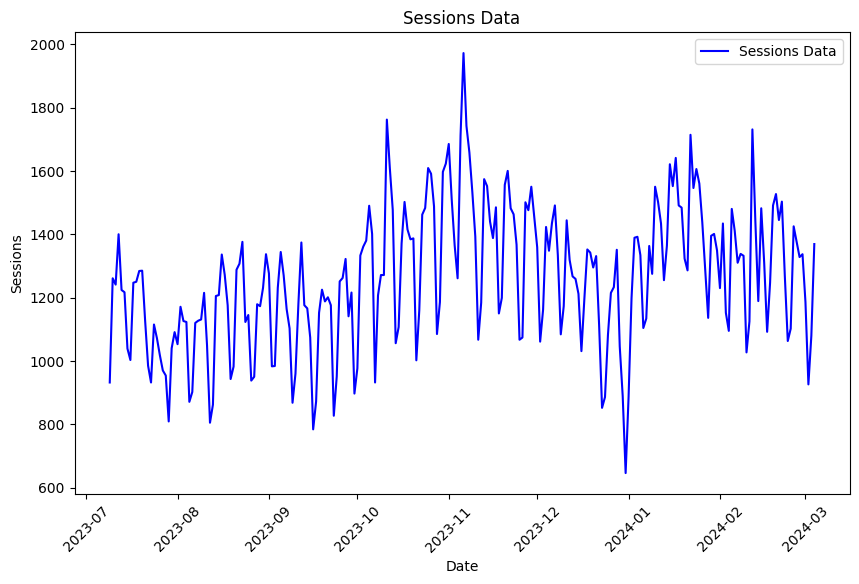

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['Sessions'], color='blue', label='Sessions Data')

plt.title('Sessions Data')
plt.xlabel('Date')
plt.ylabel('Sessions')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Here we check the stationarity of the data, now handled for outliers

This code cell calculates the Augmented Dickey-Fuller (ADF) test statistic and p-value for the time series data of website visits (Sessions) from the provided Excel file. The ADF test is used to determine the stationarity of a time series data. The adfuller function from the statsmodels.tsa.stattools module is utilized for this purpose.

In [20]:
website_visits = df['Sessions']

adf_result = adfuller(website_visits)

adf_statistic = adf_result[0]
p_value = adf_result[1]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -2.3571998850136446
p-value: 0.15418245707138423


We perform differencing to make data stationary, then check once again

In [21]:
df = df.sort_values('Date')

df['Sessions_diff'] = df['Sessions'].diff()

df = df.dropna()

website_visits = df['Sessions_diff']

adf_result = adfuller(website_visits)

adf_statistic = adf_result[0]
p_value = adf_result[1]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -4.213058986139168
p-value: 0.0006261531234918558


Plotting the differenced data

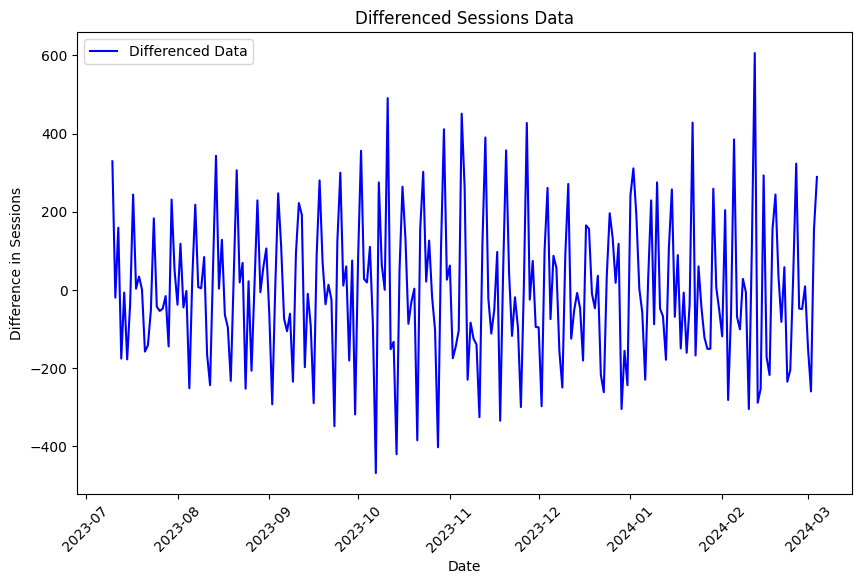

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Sessions_diff'], color='blue', label='Differenced Data')

plt.title('Differenced Sessions Data')
plt.xlabel('Date')
plt.ylabel('Difference in Sessions')
plt.xticks(rotation=45)
plt.legend()
plt.show()


We fit an ARIMA model using auto_arima to search for optimal parameters by choosing the model with the lowest AIC

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(7, 0, 0)


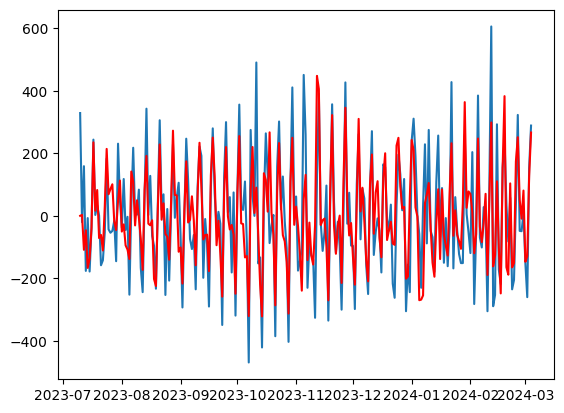

In [23]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(df['Sessions_diff'], seasonal=False, suppress_warnings=True, start_p=0, start_q=0, max_p=12, max_q=12)

optimal_order = model.order

model_fit = ARIMA(df['Sessions_diff'], order=optimal_order).fit()

df['forecast'] = model_fit.predict(dynamic=True)

print(optimal_order)

plt.plot(df['Sessions_diff'])
plt.plot(model_fit.fittedvalues, color='red')
plt.show()


We calculate the RMSE of the fitted model

In [24]:
residuals = df['Sessions_diff'] - model_fit.fittedvalues

squared_errors = residuals ** 2

mse = np.mean(squared_errors)

rmse = np.sqrt(mse)

print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 115.54580982813334


This code cell takes the previously fitted ARIMA model and generates forecasts for the next 6 months. It then plots the original differenced data, the fitted values of the ARIMA model, and the forecasted values.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


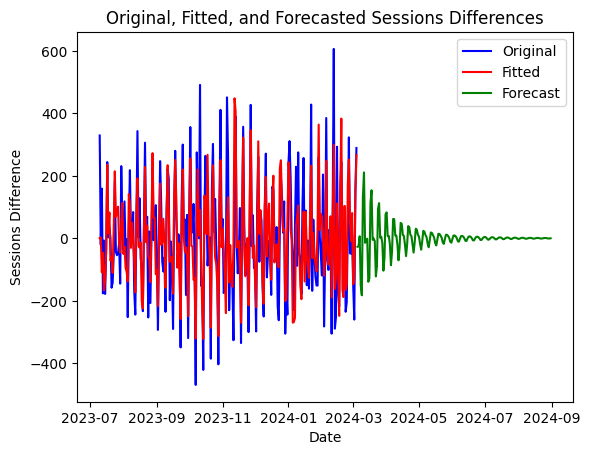

In [25]:
model_fit = ARIMA(df['Sessions_diff'], order=optimal_order).fit()

forecast_steps = 180
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1)[1:]
forecast = model_fit.forecast(steps=forecast_steps)

plt.plot(df.index, df['Sessions_diff'], label='Original', color='blue')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, label='Fitted', color='red')
plt.plot(forecast_index, forecast, label='Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('Sessions Difference')
plt.title('Original, Fitted, and Forecasted Sessions Differences')
plt.legend()

plt.show()


This code cell calculates the cumulative sum of the forecasted differences and adds it to the last observed value of sessions to generate the forecasted sessions. Then, it plots the historical sessions along with the forecasted sessions.

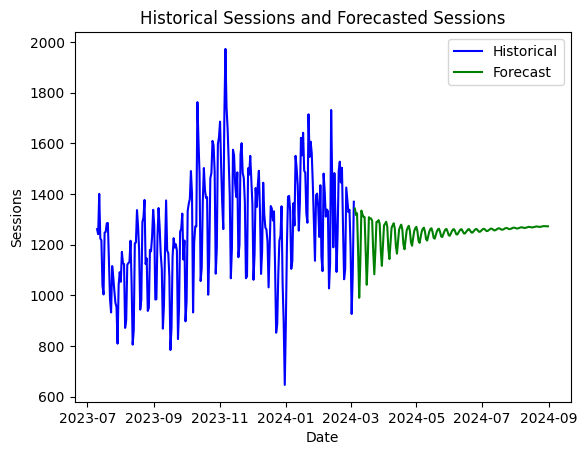

In [26]:
last_date = df.index[-1]

forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]

forecast = pd.Series(forecast, index=forecast_dates)
forecast = df['Sessions'][-1] + forecast.cumsum()

plt.plot(df.index, df['Sessions'], label='Historical', color='blue')
plt.plot(forecast.index, forecast, label='Forecast', color='green')

plt.xlabel('Date')
plt.ylabel('Sessions')
plt.title('Historical Sessions and Forecasted Sessions')
plt.legend()

plt.show()